In [1]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import os


from sklearn.preprocessing import StandardScaler

In [2]:
def compute_dcr(synthetic_data, original_data):
    """
    Compute the Distance to Closest Record (DCR) for each synthetic sample.
    
    Parameters:
    - synthetic_data: array-like, shape (n_samples, n_features), synthetic samples
    - original_data: array-like, shape (m_samples, n_features), original samples
    
    Returns:
    - dcr_scores: array of minimum distances for each synthetic sample
    """
    # Compute L1 distance between each synthetic record and all original records
    distances = cdist(synthetic_data, original_data, metric='cityblock')
    
    # Get the minimum distance to closest original record for each synthetic record
    dcr_scores = distances.min(axis=1)
    
    return dcr_scores

In [3]:
file_name = "Customer_travel_original_train.csv"
org_train_df = pd.read_csv(f"../data_split/original_train_dataset/{file_name}")

file_name = "Customer_travel_original_test.csv"
org_test_df = pd.read_csv(f"../data_split/original_test_dataset/{file_name}")


In [4]:
dataset_folder = "customer_travel"

In [5]:
os.getcwd()

'c:\\__Local Disk D\\master thesis submit version\\execution\\results_analysis_code'

In [6]:
synth_data = "../generated_datasets/customer_travel/great_gpt2_6_layer_customer_travel/samples/test/sample1.csv"
synth_data = pd.read_csv(synth_data)
synth_data = synth_data.drop('Unnamed: 0', axis=1) 
synth_data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,30.0,No,Middle Income,5.0,No,No,0.0
1,31.0,No,Middle Income,5.0,Yes,No,1.0
2,28.0,Yes,High Income,1.0,No,No,0.0
3,35.0,No,Middle Income,6.0,Yes,Yes,0.0
4,28.0,No,Middle Income,4.0,No,Yes,0.0


In [7]:
le_frequent_flyer = LabelEncoder()
le_annual_income_class = LabelEncoder()
le_account_syncted = LabelEncoder()
le_booked = LabelEncoder()

column_name = "FrequentFlyer"
org_train_df[column_name] = le_frequent_flyer.fit_transform(org_train_df[column_name])
synth_data[column_name] = le_frequent_flyer.transform(synth_data[column_name])

column_name = "AnnualIncomeClass"
org_train_df[column_name] = le_annual_income_class.fit_transform(org_train_df[column_name])
synth_data[column_name] = le_annual_income_class.transform(synth_data[column_name])

column_name = "AccountSyncedToSocialMedia"
org_train_df[column_name] = le_account_syncted.fit_transform(org_train_df[column_name])
synth_data[column_name] = le_account_syncted.transform(synth_data[column_name])

column_name = "BookedHotelOrNot"
org_train_df[column_name] = le_booked.fit_transform(org_train_df[column_name])
synth_data[column_name] = le_booked.transform(synth_data[column_name])

In [8]:
# Step 2: Standardize both datasets
scaler = StandardScaler()
org_train_df = scaler.fit_transform(org_train_df)
synth_data = scaler.transform(synth_data)

In [9]:
temp = compute_dcr(synth_data, org_train_df)

In [10]:
pd.DataFrame(temp).describe().round()


,0
count,320.0
mean,1.0
std,1.0
min,0.0
25%,0.0
50%,0.0
75%,1.0
max,3.0


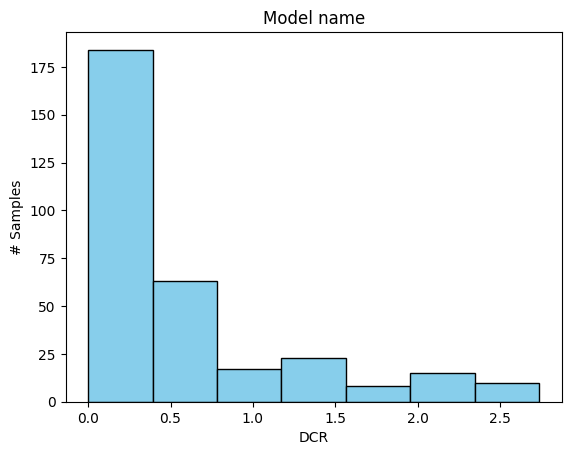

In [11]:
filtered_scores = temp[temp < 100]  # Adjust threshold as needed
plt.hist(filtered_scores, bins=7, color='skyblue', edgecolor='black')
plt.xlabel('DCR')
plt.ylabel('# Samples')
plt.title('Model name')
plt.show()

## using the dcr_customer_travel function

In [12]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import os


from sklearn.preprocessing import StandardScaler
from general_dcr import dcr_customer_travel

In [13]:
file_name = "Customer_travel_original_train.csv"
org_train_df = pd.read_csv(f"../data_split/original_train_dataset/{file_name}")

file_name = "Customer_travel_original_test.csv"
org_test_df = pd.read_csv(f"../data_split/original_test_dataset/{file_name}")


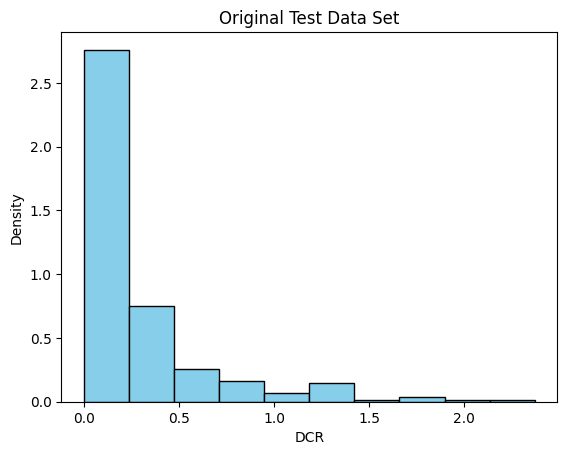

great_gpt2_12_layer_customer_travel


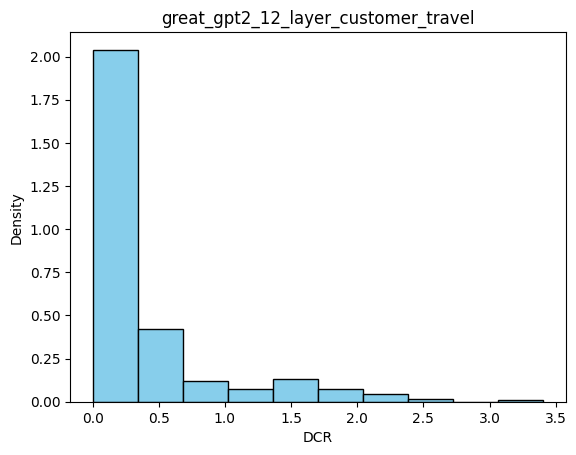

great_gpt2_6_layer_customer_travel


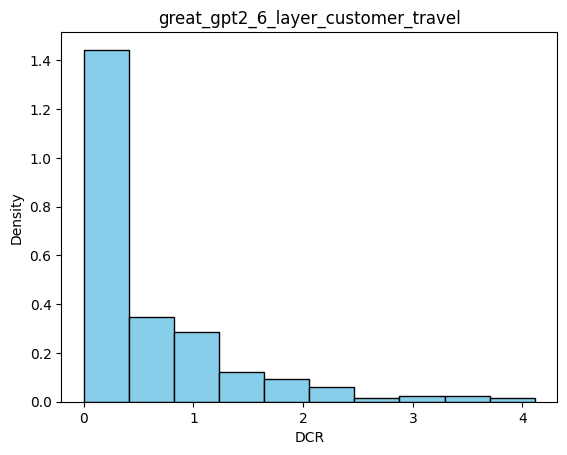

great_gpt_bigcode_12_layer_customer_travel


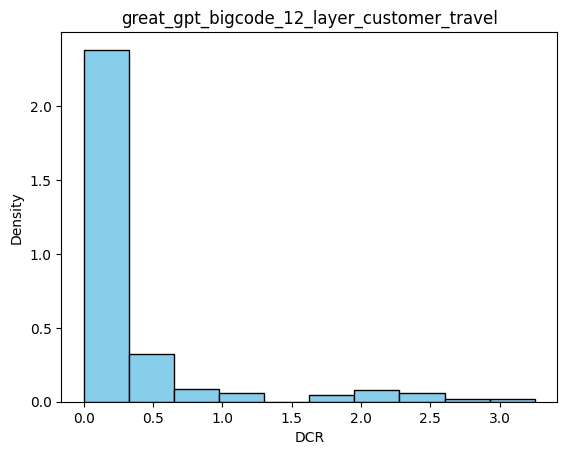

great_gpt_bigcode_6_layer_customer_travel


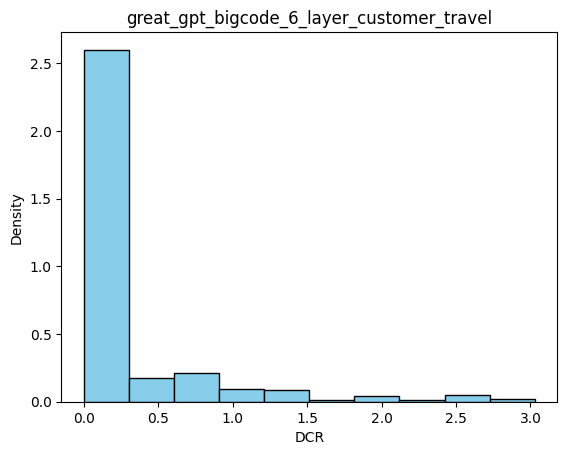

great_gpt_j_1_layer_customer_travel


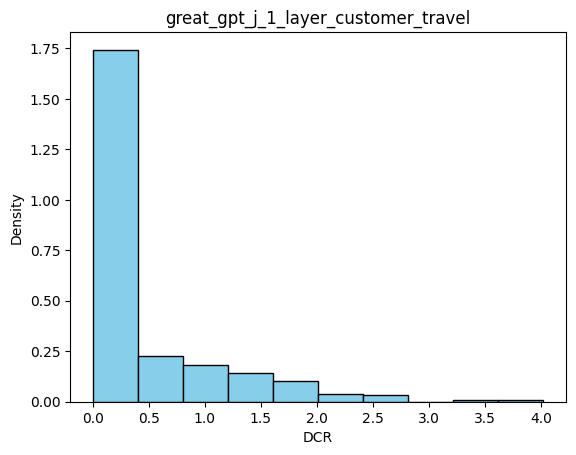

great_gpt_neox_1_layer_customer_travel


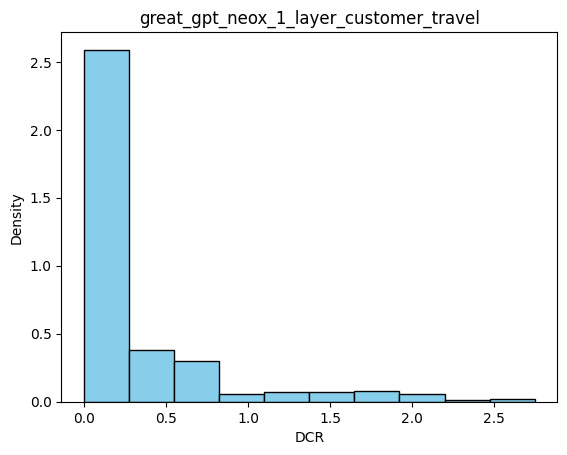

great_gpt_neo_2_layer_customer_travel


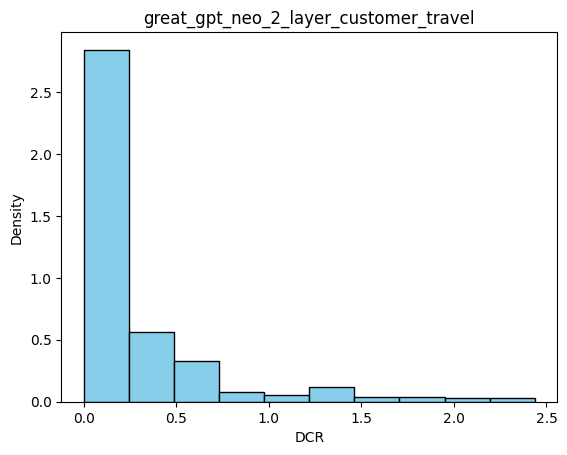

great_gpt_neo_4_layer_customer_travel


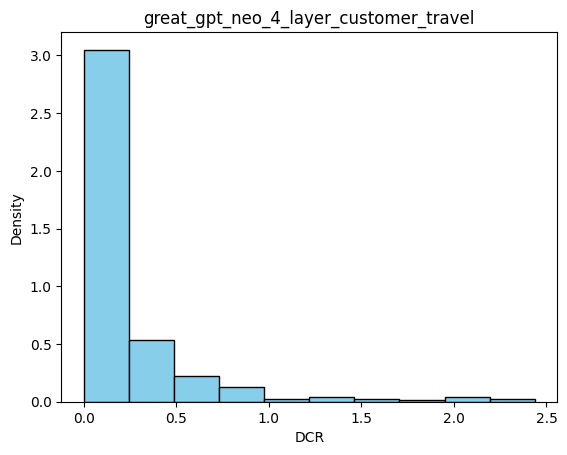

great_gpt_neo_6_layer_customer_travel


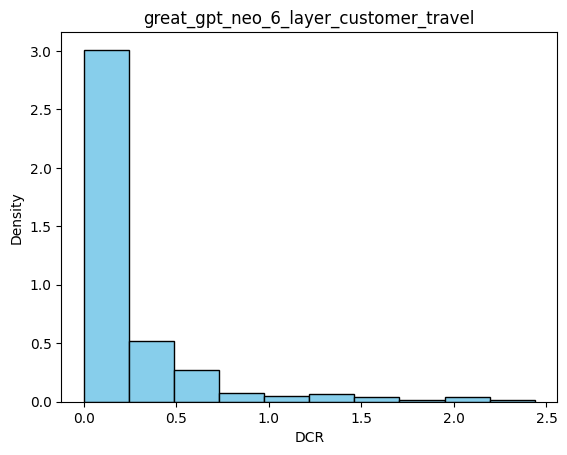

great_gpt_neo_8_layer_customer_travel


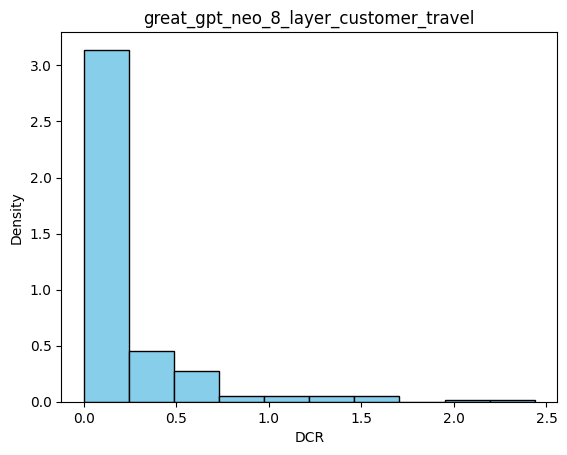

great_llama_1_layer_customer_travel


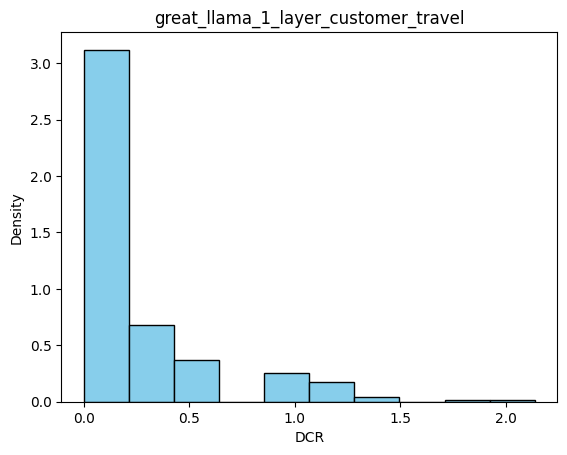

great_llama_2_layer_customer_travel


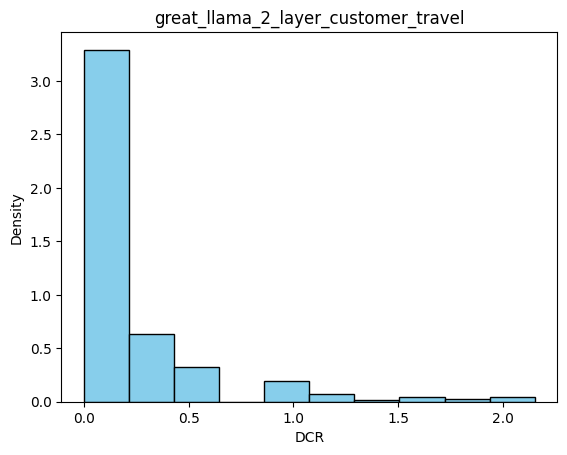

realtab_gpt2_12_layer_customer_travel


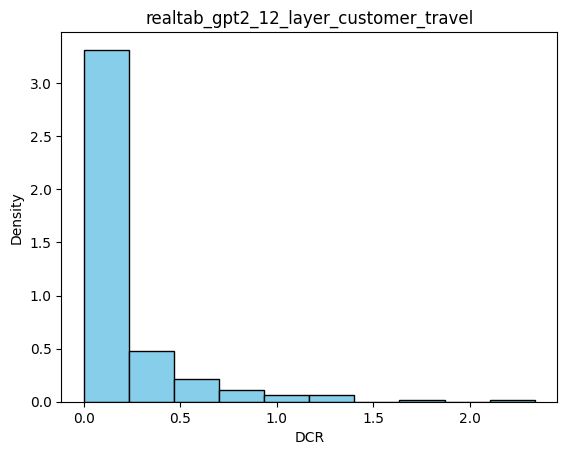

realtab_gpt2_6_layer_customer_travel


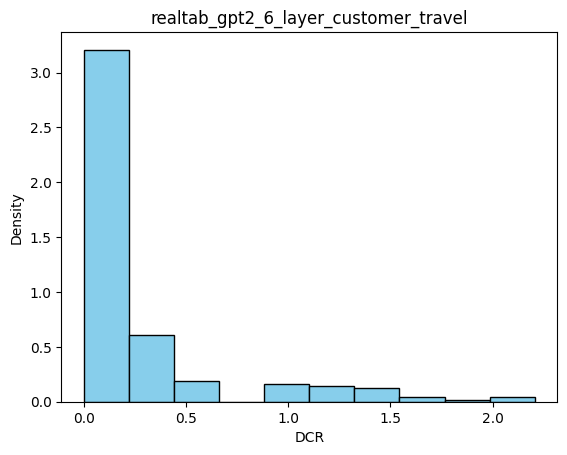

realtab_gpt_bigcode_12_layer_customer_travel


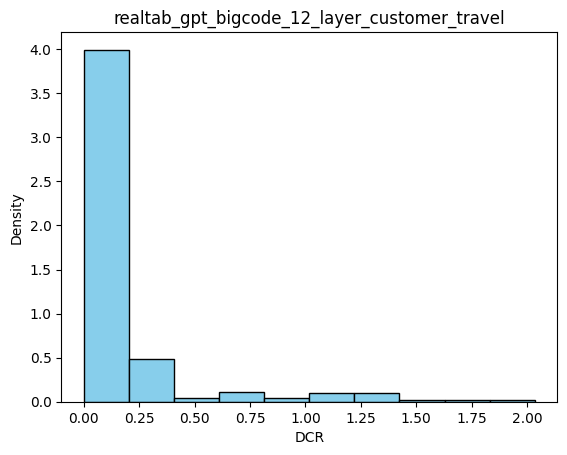

realtab_gpt_bigcode_6_layer_customer_travel


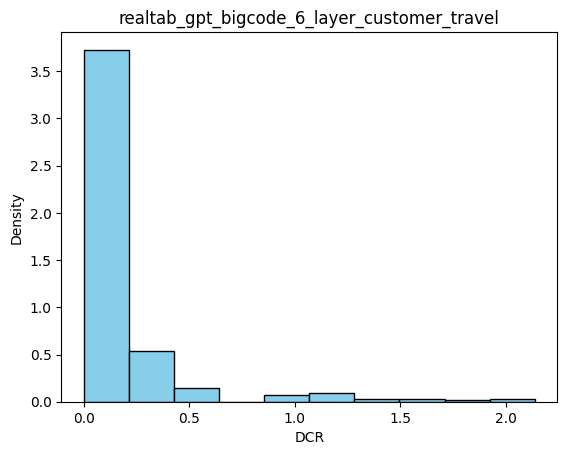

realtab_gpt_j_1_layer_customer_travel


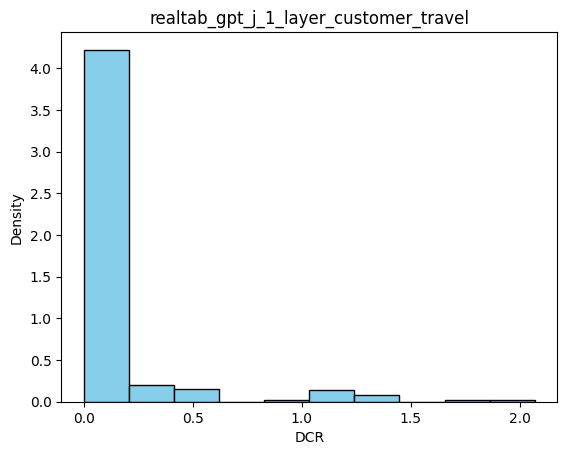

realtab_gpt_neox_1_layer_customer_travel


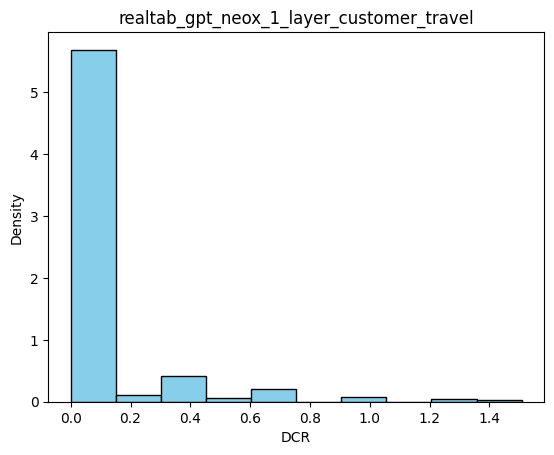

realtab_gpt_neo_2_layer_customer_travel


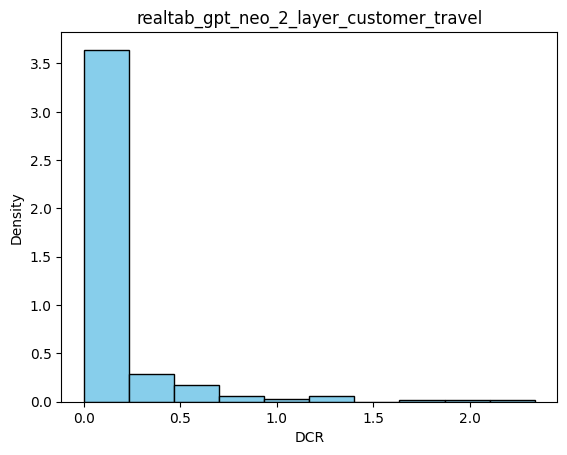

realtab_gpt_neo_4_layer_customer_travel


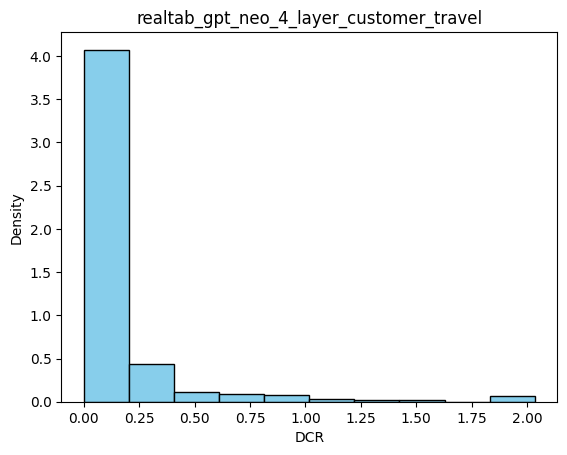

realtab_gpt_neo_6_layer_customer_travel


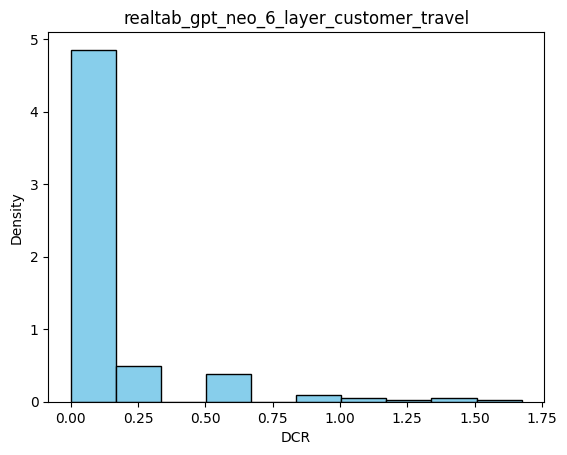

realtab_gpt_neo_8_layer_customer_travel


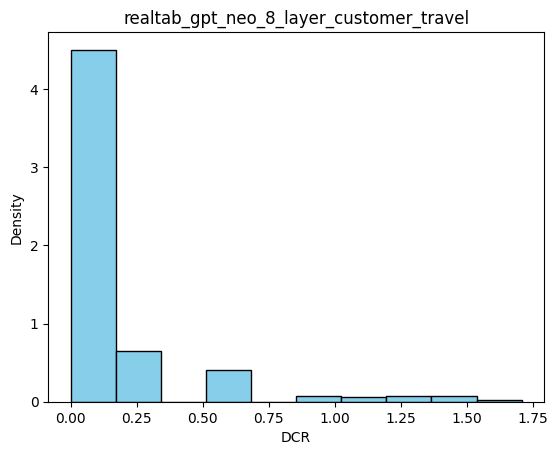

realtab_llama_1_layer_customer_travel


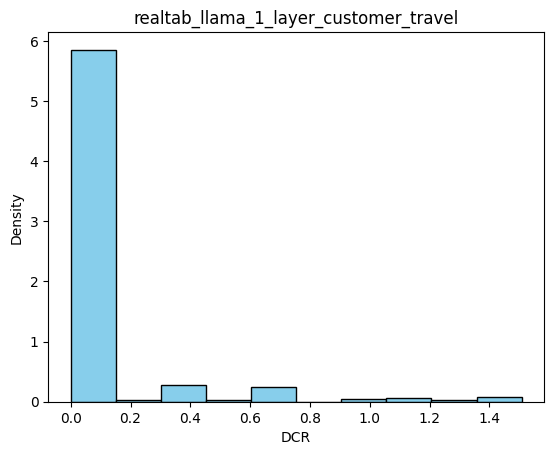

realtab_llama_2_layer_customer_travel


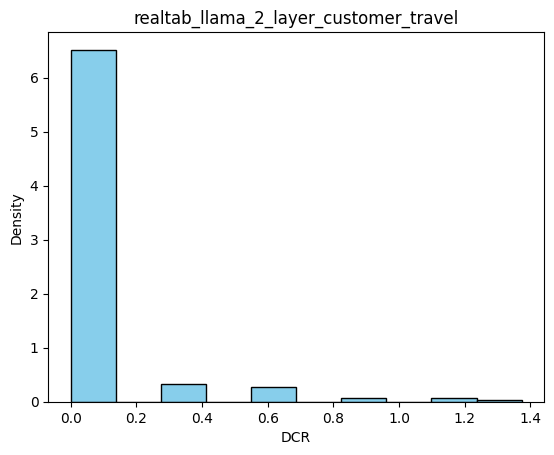

In [14]:
path_to_synthetic_dataset = "customer_travel"

dcr_customer_travel(org_train_df=org_train_df, org_test_df=org_test_df, path_to_synthetic_dataset=path_to_synthetic_dataset)